In [ ]:
from __future__ import print_function
from graph import Graph
from graph_tools import C, K, erdos_renyi, circle_plot
from MRCN_algorithms import naeps, CR, MRCN_convex

In [2]:
# complete graph on 10 vertices
G = K(10)
print(G)

# modify G
E = G.E[:] # copy original edge set
G.add_vertex(10)
G.add_edges([(0,10), (4,10),])
print('\nAdded edges:', set(G.E) - set(E))

V - [0, 1, 2, 3, 4, 5, 6, 7]
E - [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]

Added edges: {(4, 10), (0, 10)}


V - [0, 1, 2, 3]
E - [(0, 1), (1, 2), (2, 3), (0, 3)]


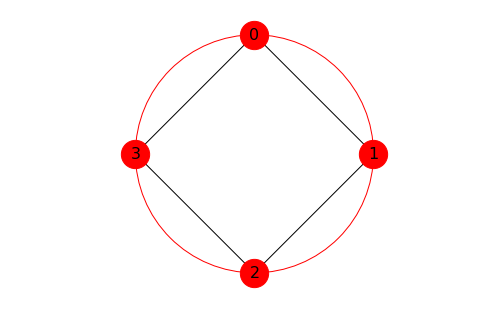

In [15]:
# cycle graph on 8 vertices
G = C(8)
print(G)
circle_plot(G)

V - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
E - [(0, 3), (0, 4), (0, 6), (0, 7), (0, 10), (1, 3), (1, 4), (1, 8), (3, 5), (3, 7), (3, 10), (4, 6), (5, 6), (5, 11), (6, 9), (7, 8), (7, 9), (8, 10)]


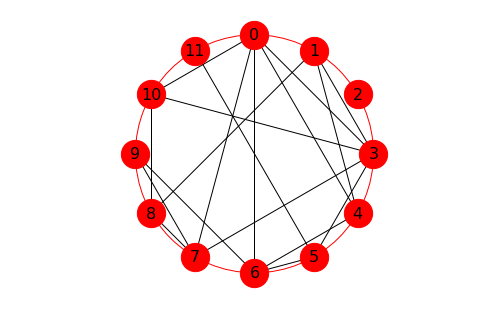

In [13]:
# Erdos-Renyi graph on 12 vertices (p=1/3)
G = erdos_renyi(12, 1/3.)
print(G)

# display nice image of graph
circle_plot(G)

V - [0, 1, 2, 3, 4, 5, 6, 7]
E - [(0, 1), (0, 7), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


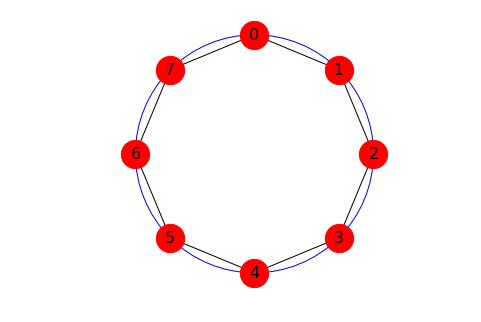

In [5]:
# construct cycle graph C(8) manually and display
V = range(8)
E = [(0,1),(0,7),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),]
G = Graph(V=V, E=E)
print(G)
circle_plot(G)

In [6]:
# find convex drawing of G=C(8) with maximal crossings
n_crossings, max_drawing = MRCN_convex(G)
print(n_crossings, max_drawing)

# verify that our program computes the correct maximum based on the proven formula when N is even:
#      max-convex-crossing-number(C(N)) = N(N - 4)/2 + 1
assert n_crossings == 8*(8 - 4)//2 + 1

17 [0, 2, 5, 7, 3, 1, 6, 4]


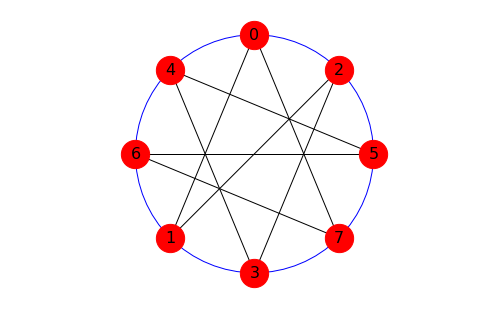

In [7]:
# image of G in maximally crossing configuration
circle_plot(G, max_drawing)

# save the image in current directory
circle_plot(G, max_drawing, save_path='best_drawing_C8.png')

In [8]:
# non-adjacent edge-pairs (naeps) of G
print(naeps(G))

[((0, 1), (2, 3)), ((0, 1), (3, 4)), ((0, 1), (4, 5)), ((0, 1), (5, 6)), ((0, 1), (6, 7)), ((0, 7), (1, 2)), ((0, 7), (2, 3)), ((0, 7), (3, 4)), ((0, 7), (4, 5)), ((0, 7), (5, 6)), ((1, 2), (3, 4)), ((1, 2), (4, 5)), ((1, 2), (5, 6)), ((1, 2), (6, 7)), ((2, 3), (4, 5)), ((2, 3), (5, 6)), ((2, 3), (6, 7)), ((3, 4), (5, 6)), ((3, 4), (6, 7)), ((4, 5), (6, 7))]


Number of crossings: 4


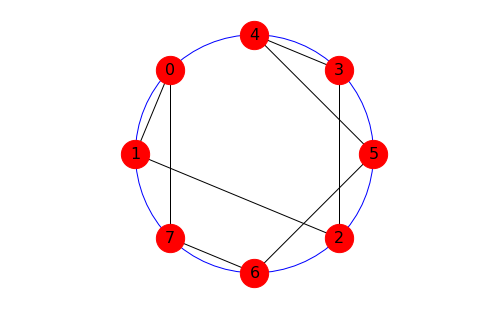

In [9]:
# find number of crossings for a particular (in this case, random) vertex ordering of G
random_drawing = G.permute()
n_crossings = CR(G, random_drawing)
print('Number of crossings:', n_crossings)
circle_plot(G, random_drawing)